# Creando nuestro propio KNN

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import warnings
from math import sqrt
from collections import Counter

In [2]:
dataset = {
    'k':[[1,2],[2,3],[3,1]],
    'r':[[6,5],[7,7],[8,6]]
}
new_point = [5,7]

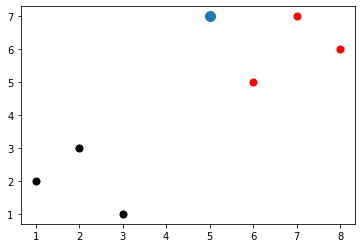

In [3]:
[[plt.scatter(ii[0], ii[1], s=50, color = i) for ii in dataset[i]] for i in dataset]
plt.scatter(new_point[0], new_point[1], s=100)

In [4]:
def k_nearest_neighbors(data, predict, k = 3, verbose = False):
    """Función de K neares Neighbors, k es la cantidad de vecinos que decidirán"""
    
    if len(data) >= k:
        warnings.warn("K es un valor menor que el número total de elementos a votar!!")
    
    distances = []
    for group in data: #Asigna la cantidad de grupos
        for feature in data[group]:#Revisa los elementos de cada grupo
            #d=sqrt((feature[0]-predict[0])**2 + (feature[1]-predict[1])**2)
            #d = np.sqrt(np.sum((np.array(feature)-np.array(predict))**2))
            d = np.linalg.norm(np.array(feature)-np.array(predict))
            #Calcular la norma, es lo mismo que calcular la distancia euclídea.
            distances.append([d, group])
    if verbose:        
        print(distances)
    
    votes = [i[1] for i in sorted(distances)[:k]]#Ordena por el primer item del array
    if verbose: 
        print("Los votos son: " +str(votes))
    #Con k, me quedo con los k más cercanos.
    #Con i en la posición uno me importa la clase, si fuese en pos 0 sería la dist.
       
    vote_result = Counter(votes).most_common(1)
    if verbose:   
        print(vote_result)
    
    return vote_result[0][0]#[('r', 2), ('k',1)]

Básicamente lo que hace la función es calcular la distancia euclídea entre cada elemento del data set y el nuevo punto, a esta distancia la indexa en un array llamado distances con el orden siguiente [(distancia, clase)], de esta manera calcula tantas distancias como puntos halla. Una vez terminado de crear el array de distancias lo ordena de la menor a la mayor distancia. Esto lo hace para luego quedarse con los k primeros (3) primeros. Y finalmente, de estos tres primeros calcula cuál es el más comun y listo, ahí está.

In [5]:
new_point = [4.5,4.333333333]
result = k_nearest_neighbors(dataset, new_point)
result

'k'

### Ploteando el punto nuevo punto.

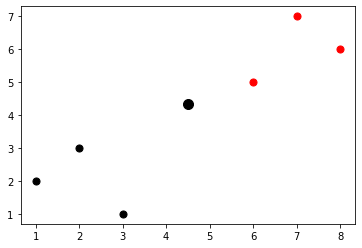

In [6]:
[[plt.scatter(ii[0], ii[1], s=50, color = i) for ii in dataset[i]] for i in dataset]
#Con el doble for, recorro cada uno de los puntos, como i va a valer r o k, es rojo o negro

plt.scatter(new_point[0], new_point[1], s=100, color=result)

# Aplicando nuestro KNN al Data Set del Cancer

In [7]:
import pandas as pd
import random

In [8]:
df = pd.read_csv("../../Data-Sets/datasets/cancer/breast-cancer-wisconsin.data.txt", header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [9]:
df.replace("?", -99999, inplace=True) ## Reemplazamos todos los valores ?

In [10]:
df.columns = ["name", "V1", "V2", "V3", "V4", "V5", "V6", "V7", "V8", "V9", "class"]

In [11]:
df = df.drop(["name"],1)

C:\Users\Kevin\AppData\Local\Temp/ipykernel_1132/1694563752.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df.drop(["name"],1)


In [12]:
full_data = df.astype(float).values.tolist()

In [13]:
random.shuffle(full_data)

In [14]:
test_size=0.2

In [15]:
train_set = {2:[], 4:[]}
test_set = {2:[],4:[]}

In [16]:
train_data = full_data[:-int(test_size*len(full_data))]# Primeros 80% hasta los últimos 20%
test_data = full_data[-int(test_size*len(full_data)):] # Últimos 20% hasta el final

In [17]:
for i in train_data:
    train_set[i[-1]].append(i[:-1]) #Nos cargamos la última columna
    
for i in test_data:
    test_set[i[-1]].append(i[:-1])#Nos cargamos la última columna

In [18]:
correct = 0
total = 0 
for group in test_set:
    for data in test_set[group]:
        vote = k_nearest_neighbors(train_set, data, k=5) #Es el valor por defecto
        if group == vote:
            correct += 1
        total +=1
print("Eficacia del KNN = ", correct/total*100)

Eficacia del KNN =  99.28057553956835
